In [1]:
import pdfplumber
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pdf_path = os.path.join(os.path.expanduser("~/Desktop/Trading/Data"), "spdr-sector-and-industry-dashboard.pdf")

pages_to_extract = [5, 6, 7]

with pdfplumber.open(pdf_path) as pdf:
    for i in pages_to_extract:
        page = pdf.pages[i]
        tables = page.extract_tables()
        print(f"\n--- Page {i+1}: Found {len(tables)} tables ---")
        for j, table in enumerate(tables):
            print(f"\nTable {j+1}:")
            for row in table:
                print(row)


--- Page 6: Found 2 tables ---

Table 1:
['ETF Name', 'Fundamentals', None, None, None, None, 'International\nExposure', 'Macro Sensitivies (Beta)', None, None, None, None]
[None, 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return\non Equity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude Oil\n(36 Mth)', 'AUM ($M)', '3 Month\nFund Flow\n($M)']

Table 2:
['Kensho', None, None, None, None, None, None, None, None, None, None, None, None, None]
['KOMP', 'SPDR Kensho S&P New Economies ETF', '2.27', '16.7', '6.8', '33.37', '14.2', '39.14', '-1.40', '-0.48', '-0.03', '1,950', '26', '5.0']
['FITE', 'SPDR S&P Kensho Future Security ETF', '2.71', '20.7', '8.9', '28.82', '12.4', '42.75', '-0.72', '-0.30', '-0.03', '83', '6', '0.6']
['ROKT', 'SPDR S&P Kensho Final Frontier ETF', '2.47', '20.2', '14.0', '44.37', '8.5', '36.56', '-1.19', '-0.34', '-0.03', '19', '0', '0.2']
['CNRG', 'SPDR

In [3]:
pdf_path = os.path.join(os.path.expanduser("~/Desktop/Trading/Data"), "spdr-sector-and-industry-dashboard.pdf")
pages_to_extract = [5, 6, 7]
dfs = []

with pdfplumber.open(pdf_path) as pdf:
    for i in pages_to_extract:
        page = pdf.pages[i]
        tables = page.extract_tables()

        if tables:
            print(f"--- Page {i+1}: Found {len(tables)} tables ---")

            # Get the correct header row (second row of Table 1)
            raw_header = tables[0][1]

            # Fix the header
            raw_header[0] = 'Ticker'
            raw_header.insert(1, 'ETF Name')
            raw_header.insert(2,'P_B')
            raw_header.insert(3, 'P_E')
            raw_header.insert(4,'ROE')
            raw_header.insert(5, 'LT_Debt_to_Capital')
            raw_header.insert(6,'EPS_growth_4_years')
            raw_header.insert(7, '%_foriegn_sales')
            raw_header.insert(8,'beta_USD')
            raw_header.insert(9, 'beta_10_yr_treasury')
            raw_header.insert(10,'beta_crude_oil')
            raw_header.insert(11, 'AUM')
            raw_header.insert(12,'3_month_money_flow')


            print(f"⚙️ Adjusted header (len={len(raw_header)}): {raw_header}")

            # Process data rows from Table 2
            for row in tables[1][1:]:
                # Trim or pad each data row to match the header length
                if len(row) < len(raw_header):
                    row += [None] * (len(raw_header) - len(row))
                elif len(row) > len(raw_header):
                    row = row[:len(raw_header)]

                dfs.append(dict(zip(raw_header, row)))

# Convert to DataFrame
full_df = pd.DataFrame(dfs)

# Quick check
print(full_df.shape)

--- Page 6: Found 2 tables ---
⚙️ Adjusted header (len=24): ['Ticker', 'ETF Name', 'P_B', 'P_E', 'ROE', 'LT_Debt_to_Capital', 'EPS_growth_4_years', '%_foriegn_sales', 'beta_USD', 'beta_10_yr_treasury', 'beta_crude_oil', 'AUM', '3_month_money_flow', 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return\non Equity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude Oil\n(36 Mth)', 'AUM ($M)', '3 Month\nFund Flow\n($M)']
--- Page 7: Found 2 tables ---
⚙️ Adjusted header (len=24): ['Ticker', 'ETF Name', 'P_B', 'P_E', 'ROE', 'LT_Debt_to_Capital', 'EPS_growth_4_years', '%_foriegn_sales', 'beta_USD', 'beta_10_yr_treasury', 'beta_crude_oil', 'AUM', '3_month_money_flow', 'Price\nto\nBook', 'Price to\nEarnings\n(FY1)', 'Return on\nEquity\n(%)', 'LT\nDebt to\nCapital\n(%)', 'EST\n3–5\nYears\nEPS\nGrowth\n(%)', '% Foreign Sales', 'US $\n(36 Mth)', 'US\n10 Year\nYield\n(36 Mth)', 'Brent\nCrude 

In [4]:
# Drop rows with index 6 and 27
clean_df = full_df.drop(index=[6, 27,29]).reset_index(drop=True)

print(clean_df.shape)
clean_df.head(3)

(36, 25)


,Ticker,ETF Name,P_B,P_E,ROE,LT_Debt_to_Capital,EPS_growth_4_years,%_foriegn_sales,beta_USD,beta_10_yr_treasury,...,Return\non Equity\n(%),LT\nDebt to\nCapital\n(%),EST\n3–5\nYears\nEPS\nGrowth\n(%),% Foreign Sales,US $\n(36 Mth),US\n10 Year\nYield\n(36 Mth),Brent\nCrude Oil\n(36 Mth),AUM ($M),3 Month\nFund Flow\n($M),Return on\nEquity\n(%)
0,KOMP,SPDR Kensho S&P New Economies ETF,2.27,16.7,6.8,33.37,14.2,39.14,-1.40,-0.48,...,NaN,None,None,None,None,None,None,None,None,NaN
1,FITE,SPDR S&P Kensho Future Security ETF,2.71,20.7,8.9,28.82,12.4,42.75,-0.72,-0.30,...,NaN,None,None,None,None,None,None,None,None,NaN
2,ROKT,SPDR S&P Kensho Final Frontier ETF,2.47,20.2,14.0,44.37,8.5,36.56,-1.19,-0.34,...,NaN,None,None,None,None,None,None,None,None,NaN


In [5]:
clean_df[['P_E', 'EPS_growth_4_years']] = clean_df[['P_E', 'EPS_growth_4_years']].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

# Drop rows where either is missing or zero (to avoid log(0) errors)
reg_df = clean_df.dropna(subset=['P_E', 'EPS_growth_4_years']).copy()
reg_df = reg_df[(reg_df['P_E'] > 0) & (reg_df['EPS_growth_4_years'] > 0)]
reg_df['ln_PE'] = np.log(reg_df['P_E'])

reg_df.head(2)

,Ticker,ETF Name,P_B,P_E,ROE,LT_Debt_to_Capital,EPS_growth_4_years,%_foriegn_sales,beta_USD,beta_10_yr_treasury,...,LT\nDebt to\nCapital\n(%),EST\n3–5\nYears\nEPS\nGrowth\n(%),% Foreign Sales,US $\n(36 Mth),US\n10 Year\nYield\n(36 Mth),Brent\nCrude Oil\n(36 Mth),AUM ($M),3 Month\nFund Flow\n($M),Return on\nEquity\n(%),ln_PE
0,KOMP,SPDR Kensho S&P New Economies ETF,2.27,16.7,6.8,33.37,14.2,39.14,-1.40,-0.48,...,None,None,None,None,None,None,None,None,NaN,2.815409
1,FITE,SPDR S&P Kensho Future Security ETF,2.71,20.7,8.9,28.82,12.4,42.75,-0.72,-0.30,...,None,None,None,None,None,None,None,None,NaN,3.030134


In [6]:
# Calculate average P/E for those sector ETFs
average_pe_sector = reg_df['P_E'].mean()

print("📊 Average P/E for sector ETFs (rows 26-36):", average_pe_sector)
print(''' Use the avergae pe as the base for the percentage change in the pe for the underlying. Do NOT use the intercept. ''')

📊 Average P/E for sector ETFs (rows 26-36): 17.3
 Use the avergae pe as the base for the percentage change in the pe for the underlying. Do NOT use the intercept. 


In [7]:
# Setup regression
X = sm.add_constant(reg_df['EPS_growth_4_years'])
y = reg_df['ln_PE']

model = sm.OLS(y, X).fit()
print(model.summary())

print(''' the coefficient is the expected p/e when the growth is 0. the coefficient beta is the expected percentage increase in the p/e per unit increase in the independent var, aka the growth  ''')


print('''
NO SIGNIFICANCE''')

print('''EXPECTATION OF A LOG LINEAR RELATIONSHIP PROBABLY MISSPECIFIED''')

                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.427
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.129
Time:                        17:14:23   Log-Likelihood:                -1.2482
No. Observations:                  36   AIC:                             6.496
Df Residuals:                      34   BIC:                             9.663
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6279      0

In [8]:
# Isolate sector SPDR ETFs (rows 26 to 36)
sector_df = reg_df.loc[26:36].copy()

# Set up regression
X_sector = sm.add_constant(sector_df['EPS_growth_4_years'])
y_sector = sector_df['ln_PE']

model_sector = sm.OLS(y_sector, X_sector).fit()

print(model_sector.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     4.572
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0649
Time:                        17:14:23   Log-Likelihood:                 7.2748
No. Observations:                  10   AIC:                            -10.55
Df Residuals:                       8   BIC:                            -9.944
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7077      0

/Users/nicholassanso/anaconda3/envs/dsi/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


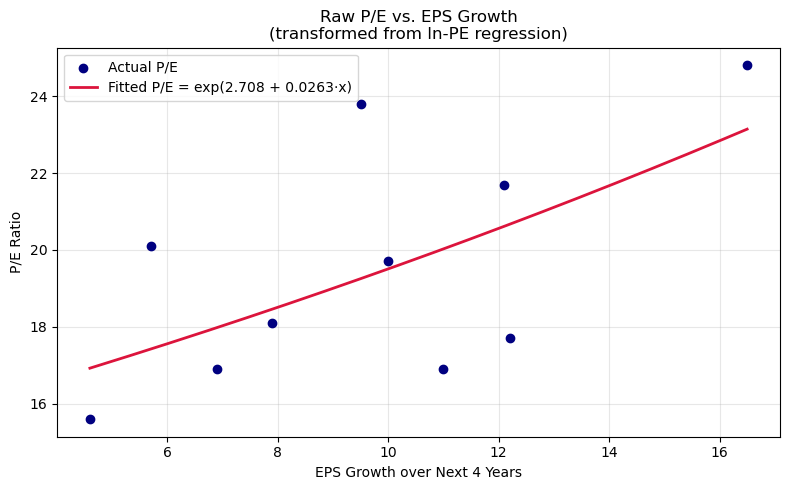

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Extract model coefficients
intercept = 2.7077
slope     = 0.0263

# Recover raw P/E
sector_df['PE'] = np.exp(sector_df['ln_PE'])

# Scatter data
x = sector_df['EPS_growth_4_years']
y = sector_df['PE']

# Fitted curve on the absolute scale
x_fit   = np.linspace(x.min(), x.max(), 200)
ln_pe_f = intercept + slope * x_fit
pe_fit   = np.exp(ln_pe_f)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='navy', label='Actual P/E', zorder=3)
plt.plot(x_fit, pe_fit, color='crimson', lw=2,
         label=f'Fitted P/E = exp({intercept:.3f} + {slope:.4f}·x)')
plt.xlabel('EPS Growth over Next 4 Years')
plt.ylabel('P/E Ratio')
plt.title('Raw P/E vs. EPS Growth\n(transformed from ln-PE regression)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# Isolate sector SPDR ETFs (rows 26 to 36)
sector_df = reg_df.loc[26:36].copy()

# Convert beta_10_yr_treasury to numeric if not already
sector_df['beta_10_yr_treasury'] = pd.to_numeric(sector_df['beta_10_yr_treasury'], errors='coerce')

# Drop rows with missing values in either independent variable or ln_PE
sector_df = sector_df.dropna(subset=['EPS_growth_4_years', 'beta_10_yr_treasury', 'ln_PE'])

# Set up regression with two independent variables
X_sector = sector_df[['EPS_growth_4_years', 'beta_10_yr_treasury']]
X_sector = sm.add_constant(X_sector)  # add intercept

y_sector = sector_df['ln_PE']

# Fit model
model_sector = sm.OLS(y_sector, X_sector).fit()

# Print results
print(model_sector.summary())


print('''
NO SIGNIFICANCE, likely too many vars for the observations''')

                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2.749
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.132
Time:                        17:14:23   Log-Likelihood:                 7.9124
No. Observations:                  10   AIC:                            -9.825
Df Residuals:                       7   BIC:                            -8.917
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6281    

/Users/nicholassanso/anaconda3/envs/dsi/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
# Log-transform both variables
reg_df['ln_Growth'] = np.log(reg_df['EPS_growth_4_years'])

# Set up regression: ln_PE ~ ln_Growth
X = sm.add_constant(reg_df['ln_Growth'])
y = reg_df['ln_PE']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_PE   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.029
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0908
Time:                        17:14:23   Log-Likelihood:               -0.95305
No. Observations:                  36   AIC:                             5.906
Df Residuals:                      34   BIC:                             9.073
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3382      0.279      8.387      0.0